In [3]:
import requests
import time
import pandas as pd
import datetime
import seaborn as sns
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
%matplotlib inline

In [46]:
word = 'matka'
start = '2017-12-01'
end = '2017-12-02'
language = 'pl'
url = u'https://twitter.com/search?q='+word+'%20since%3A'+start+'%20until%3A'+end+'&l='+language+'&src=typd&f=tweets'

'https://twitter.com/search?q=matka%20since%3A2017-12-01%20until%3A2017-12-02&l=pl&src=typd&f=tweets'

In [194]:
browser = webdriver.Chrome()
browser.get(url)
time.sleep(1)
body = browser.find_element_by_tag_name('body')
for _ in range(5):
    body.send_keys(Keys.PAGE_DOWN)
    time.sleep(0.2)

In [76]:
tweets = [tweet.text for tweet in browser.find_elements_by_class_name("tweet-text") if word in tweet.text]
len(tweets)

22

In [152]:
tweets = list()

In [196]:
for date in browser.find_elements_by_class_name("content"):
    soup = BeautifulSoup(date.get_attribute('outerHTML'), 'lxml')
    tweet = soup.find("p", class_="tweet-text").text
    date = datetime.datetime.fromtimestamp(int(soup.find("span", class_="_timestamp").get('data-time'))).strftime('%Y-%m-%d %H:%M:%S')
    tweets.append((date, tweet))

In [197]:
browser.close()

In [156]:
df = pd.DataFrame(tweets)

In [159]:
df.columns = ['when', 'tweet']

In [160]:
df['length'] = len(df['tweet'])

In [162]:
for i in range(len(df)):
    df['length'][i] = len(df['tweet'][i])

C:\Users\Weronika\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [163]:
df

,when,tweet,length
0,2017-12-02 00:58:45,Ale matka nie została wyjebana do bosforu,42
1,2017-12-02 00:43:45,Ja byłem zawsze ten odpowiedzialny więc nie wi...,97
2,2017-12-02 00:38:39,Matka z synem tacy zgrani,26
3,2017-12-02 00:27:23,"Nadęte i udawane. Ale dlaczego nie: ""Unia to n...",224
4,2017-12-02 00:18:49,Niech Matka Boża nad Panią czuwa.,33
5,2017-12-02 00:05:12,moja matka położyła się z psem na łóżku i z ni...,67
6,2017-12-01 23:59:08,"zjebalam probne matury, a matka od razu zaczyn...",158
7,2017-12-01 23:57:37,matka do mnie gada ze mam nie uzywac telefonu ...,96
8,2017-12-01 23:54:10,"zmówiłam a Pan niech spróbuje odmówić ""Nowennę...",281
9,2017-12-01 23:48:12,Nie wierze jak wlasna matka moze doprowadzic c...,67


In [201]:
type(df.when)

pandas.core.series.Series

In [200]:
df.when = pd.to_datetime(df.when)

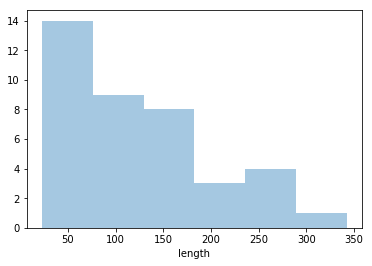

In [192]:
sns.distplot(df.length, kde = False, rug = False);

In [203]:
pd.to_date(df.when)

AttributeError: module 'pandas' has no attribute 'to_date'

,when,tweet,length
0,2017-12-02 00:58:45,Ale matka nie została wyjebana do bosforu,42
1,2017-12-02 00:43:45,Ja byłem zawsze ten odpowiedzialny więc nie wi...,97
2,2017-12-02 00:38:39,Matka z synem tacy zgrani,26
3,2017-12-02 00:27:23,"Nadęte i udawane. Ale dlaczego nie: ""Unia to n...",224
4,2017-12-02 00:18:49,Niech Matka Boża nad Panią czuwa.,33


In [207]:
df['time'] = df['when'].dt.time

In [208]:
df

,when,tweet,length,date,time
0,2017-12-02 00:58:45,Ale matka nie została wyjebana do bosforu,42,2017-12-02,00:58:45
1,2017-12-02 00:43:45,Ja byłem zawsze ten odpowiedzialny więc nie wi...,97,2017-12-02,00:43:45
2,2017-12-02 00:38:39,Matka z synem tacy zgrani,26,2017-12-02,00:38:39
3,2017-12-02 00:27:23,"Nadęte i udawane. Ale dlaczego nie: ""Unia to n...",224,2017-12-02,00:27:23
4,2017-12-02 00:18:49,Niech Matka Boża nad Panią czuwa.,33,2017-12-02,00:18:49
5,2017-12-02 00:05:12,moja matka położyła się z psem na łóżku i z ni...,67,2017-12-02,00:05:12
6,2017-12-01 23:59:08,"zjebalam probne matury, a matka od razu zaczyn...",158,2017-12-01,23:59:08
7,2017-12-01 23:57:37,matka do mnie gada ze mam nie uzywac telefonu ...,96,2017-12-01,23:57:37
8,2017-12-01 23:54:10,"zmówiłam a Pan niech spróbuje odmówić ""Nowennę...",281,2017-12-01,23:54:10
9,2017-12-01 23:48:12,Nie wierze jak wlasna matka moze doprowadzic c...,67,2017-12-01,23:48:12
